In [12]:
import numpy as np
import pickle
from scipy.stats import pearsonr
import sys

%matplotlib inline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

sys.path.append('../')
import scripts.outliers as outliers
import scripts.utils_spatial as utils_spatial

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
X_list, Y, Yaudio = pickle.load(open('../data/lda_data_melodia_8.pickle','rb'))
ddf = outliers.load_metadata(Yaudio, metadata_file='../data/metadata.csv')
w, data_countries = utils_spatial.get_neighbors_for_countries_in_dataset(Y)
w_dict = utils_spatial.from_weights_to_dict(w, data_countries)
Xrhy, Xmel, Xmfc, Xchr = X_list
X = np.concatenate((Xrhy, Xmel, Xmfc, Xchr), axis=1)

Island ids:  [3, 6, 26, 35, 39, 45, 52, 61, 62, 66, 77, 85, 94, 97, 98, 102, 103, 107, 110, 120, 121]
Antigua and Barbuda
Australia
Cuba
Fiji
French Polynesia
Grenada
Iceland
Jamaica
Japan
Kiribati
Malta
New Zealand
Philippines
Puerto Rico
Republic of Serbia
Saint Lucia
Samoa
Solomon Islands
South Korea
The Bahamas
Trinidad and Tobago


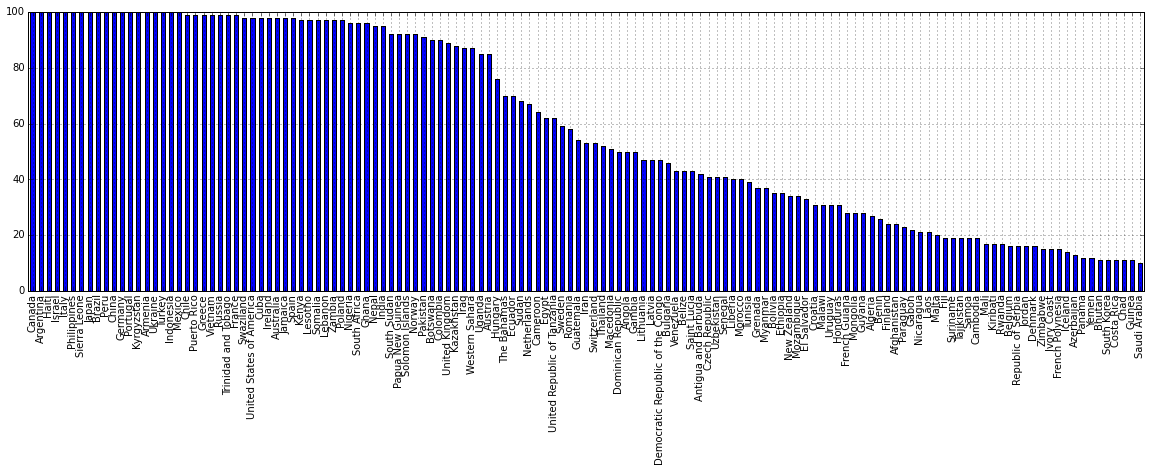

In [9]:
import pandas as pd
df_country = pd.DataFrame(data=Y, columns=['country'])
plt.figure(figsize=(20, 5))
df_country['country'].value_counts().plot(kind='bar');

In [13]:
# global outliers
df_global, threshold, MD = outliers.get_outliers_df(X, Y, chi2thr=0.999)
outliers.print_most_least_outliers_topN(df_global, N=10)

most outliers 
           Country  Outliers  N_Country  N_Outliers
59            Chad  0.636364         11           7
86          Gambia  0.540000         50          27
17   French Guiana  0.535714         28          15
42           Benin  0.500000         26          13
78     El Salvador  0.484848         33          16
136       Botswana  0.477778         90          43
6          Bolivia  0.457143         35          16
104         Bhutan  0.454545         11           5
14         Liberia  0.450000         40          18
62         Senegal  0.439024         41          18
least outliers 
                              Country  Outliers  N_Country  N_Outliers
1                           Lithuania  0.000000         47           0
107                          Kiribati  0.000000         17           0
119                           Denmark  0.000000         16           0
120                        Kazakhstan  0.000000         88           0
109  Democratic Republic of the Congo  0.0

In [30]:
df_global['N'] = np.zeros(len(df_global))
df_global['OutliersN'] = np.zeros(len(df_global))
for i, country in enumerate(df_global['Country']):
    n_counts = len(np.where(Y==country)[0])
    df_global['N'].iloc[i] = n_counts
    df_global['OutliersN'].iloc[i] = np.round(n_counts * df_global['Outliers'].iloc[i])
df_global.head()

,Country,Outliers,N,OutliersN
0,Canada,0.060000,100,6
1,Lithuania,0.000000,47,0
2,Cambodia,0.263158,19,5
3,Ethiopia,0.257143,35,9
4,Swaziland,0.142857,98,14


0.662469099039 1.18268680985e-18


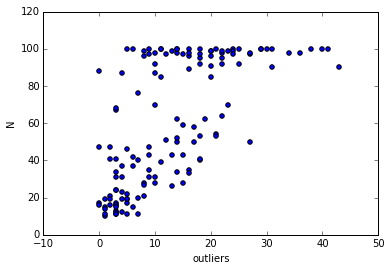

In [39]:
corr, pval = pearsonr(df_global['OutliersN'], df_global['N'])
print corr, pval

plt.scatter(df_global['OutliersN'], df_global['N'])
plt.xlabel('outliers')
plt.ylabel('N')

-0.122714085273 0.153126076772


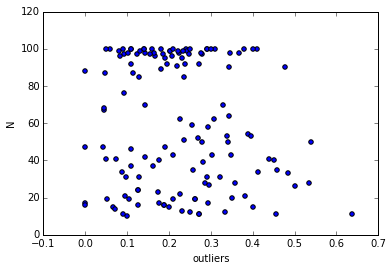

In [42]:
corr, pval = pearsonr(df_global['Outliers'], df_global['N'])
print corr, pval

plt.scatter(df_global['Outliers'], df_global['N'])
plt.xlabel('outliers')
plt.ylabel('N')

In [15]:
feat = [Xrhy, Xmel, Xmfc, Xchr]
feat_labels = ['rhy', 'mel', 'mfc', 'chr']
tabs_feat = []
for i in range(len(feat)):
    XX = feat[i]
    df_feat, threshold, MD = outliers.get_outliers_df(XX, Y, chi2thr=0.999)
    outliers.print_most_least_outliers_topN(df_feat, N=5)

most outliers 
      Country  Outliers  N_Country  N_Outliers
43      Benin  0.461538         26          12
136  Botswana  0.422222         90          38
84     Belize  0.418605         43          18
19      Yemen  0.416667         12           5
67     Brazil  0.370000        100          37
least outliers 
         Country  Outliers  N_Country  N_Outliers
113      Iceland         0         14         NaN
70    Costa Rica         0         11         NaN
28    Tajikistan         0         19         NaN
27   South Korea         0         11         NaN
107     Kiribati         0         17         NaN
most outliers 
      Country  Outliers  N_Country  N_Outliers
96    Uruguay  0.580645         31          18
117  Zimbabwe  0.533333         15           8
61       Chad  0.454545         11           5
69     Guinea  0.454545         11           5
86     Gambia  0.440000         50          22
least outliers 
         Country  Outliers  N_Country  N_Outliers
17   Ivory Coast  0.0000

In [14]:
import sys
sys.path.append('../')
import scripts.utils as utils
from collections import Counter
#spatial_outliers = utils.get_local_outliers_from_neighbors_dict(X, Y, w_dict, chi2thr=0.999, do_pca=True)
spatial_counts = Counter(dict([(ll[0],ll[1]) for ll in spatial_outliers]))
df_local = outliers.country_outlier_df(spatial_counts, Y, normalize=True)
outliers.print_most_least_outliers_topN(df_local, N=10)

most outliers 
                         Country  Outliers  N_Country  N_Outliers
64                    Mozambique  0.382353         34          13
117                     Zimbabwe  0.333333         15           5
27                         Kenya  0.288660         97          28
67                        Brazil  0.270000        100          27
76                          Iran  0.264151         53          14
30                        Turkey  0.240000        100          24
65                        Uganda  0.211765         85          18
4                       Ethiopia  0.200000         35           7
126                  South Sudan  0.195652         92          18
91   United Republic of Tanzania  0.193548         62          12
least outliers 
             Country  Outliers  N_Country  N_Outliers
0             Canada         0        100           0
94              Iraq         0         87           0
93           Grenada         0         37           0
90  French Polynesia       

In [7]:
X.shape

(8200, 380)

In [8]:
Y.shape

(8200,)